## Objective:

Automatizar la descarga de informacion de las sondas de 
Ripe Atlas, Necesitamos conseguir todas las sondas disponibles en el 
continente americano




In [79]:
import requests
import pandas as pd
# Código del país (ISO Alpha-2)
country_code = "MX"

# URL del endpoint
url = f"https://atlas.ripe.net/api/v2/probes/?country_code=MX"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    probes = data["results"]
    
    print(f"Se encontraron {len(probes)} probes conectadas en {country_code}.")
    
    
else:
    print("Error al consultar:", response.status_code)


Se encontraron 100 probes conectadas en MX.


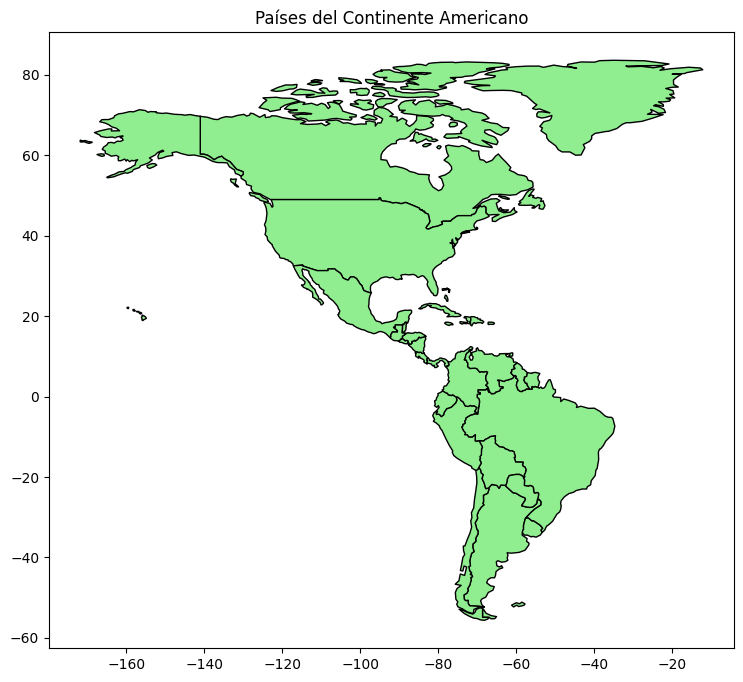

In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Cambia la ruta al lugar donde descomprimiste el shapefile
shapefile_path = "/home/augusto/lacnic/inv-2025/data/ne_110m_admin_0_countries.shp"
# Cargar el archivo shapefile
world = gpd.read_file(shapefile_path)
#americas_geo = world[world["CONTINENT"].isin(["North America", "South America"])]
americas_geo = world[world["CONTINENT"].isin(["North America", "South America"])].copy()


# Graficar
americas_geo.plot(figsize=(10, 8), edgecolor='black', color='lightgreen')
plt.title("Países del Continente Americano")
plt.show()

In [81]:
americas = pd.read_csv('/home/augusto/lacnic/inv-2025/americas_data.csv')

In [82]:
def get_country_probes(coun):
    # URL del endpoint
    # ?status=1&country_code=
    url = f"https://atlas.ripe.net/api/v2/probes/?status=1&country_code={coun}"
    # Realiza la solicitud
    response = requests.get(url)
    
    # Verifica si fue exitosa
    try:
        if response.status_code == 200:
            data = response.json()
            probes = data["results"]
            print(f"Se encontraron {len(probes)} probes conectadas en {coun}.")
            return probes
            
    except:
        print("Error al consultar:", response.status_code)
        return []


In [83]:
sondas =[]
df_down = []
for idx,row in americas.iterrows():
    info = get_country_probes(row['ISO_A2'])
    sondas += info
    df_down.append({"country":row['ISO_A2'],'count':len(info)})


Se encontraron 100 probes conectadas en CA.
Se encontraron 100 probes conectadas en US.
Se encontraron 51 probes conectadas en AR.
Se encontraron 80 probes conectadas en CL.
Se encontraron 2 probes conectadas en HT.
Se encontraron 13 probes conectadas en DO.
Se encontraron 0 probes conectadas en BS.
Se encontraron 0 probes conectadas en FK.
Se encontraron 1 probes conectadas en GL.
Se encontraron 45 probes conectadas en MX.
Se encontraron 18 probes conectadas en UY.
Se encontraron 96 probes conectadas en BR.
Se encontraron 20 probes conectadas en BO.
Se encontraron 14 probes conectadas en PE.
Se encontraron 30 probes conectadas en CO.
Se encontraron 27 probes conectadas en PA.
Se encontraron 17 probes conectadas en CR.
Se encontraron 8 probes conectadas en NI.
Se encontraron 8 probes conectadas en HN.
Se encontraron 1 probes conectadas en SV.
Se encontraron 8 probes conectadas en GT.
Se encontraron 1 probes conectadas en BZ.
Se encontraron 33 probes conectadas en VE.
Se encontraron 0 p

In [84]:
df_cx = pd.DataFrame(df_down)
df_cx

,country,count
0,CA,100
1,US,100
2,AR,51
3,CL,80
4,HT,2
5,DO,13
6,BS,0
7,FK,0
8,GL,1
9,MX,45


In [85]:
americas_geo["sondas"] = americas_geo['ISO_A2'].map(df_cx.set_index('country')['count'])

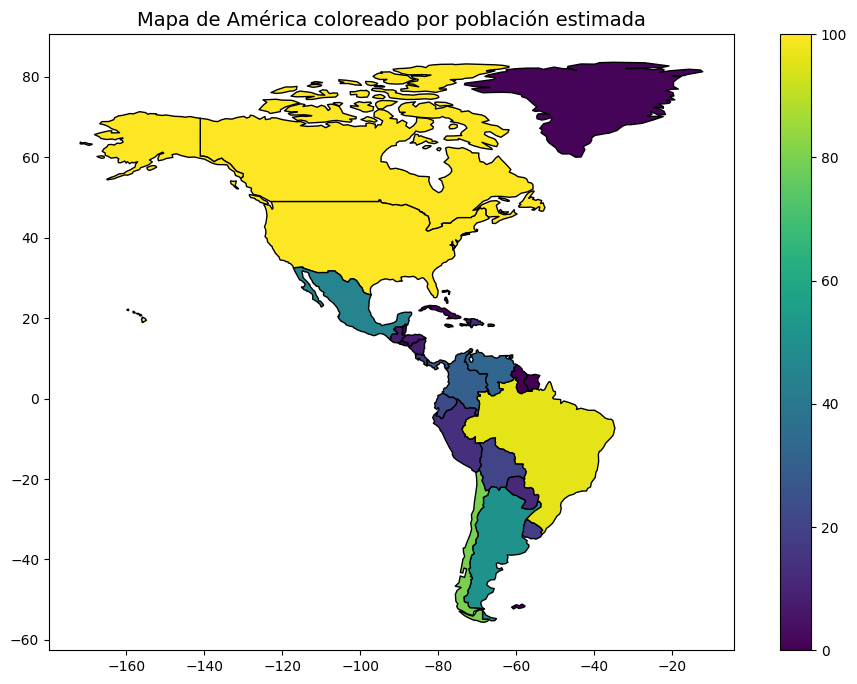

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Graficar usando una columna (ej. población estimada "POP_EST")
americas_geo.plot(
    column="sondas",          # <- columna que define los colores
    cmap="viridis",            # <- paleta de colores (viridis, plasma, coolwarm, etc.)
    legend=True,               # <- agrega barra de colores
    figsize=(12, 8),
    edgecolor="black"
)

plt.title("Mapa de América coloreado por población estimada", fontsize=14)
plt.show()


In [38]:
#len(sondas)

In [39]:
#sondas[5]

# procesamiento de Datos

para hacer visualizaciones mas sencillas debemos 
evitar tener informacion anidada en otros diccionarios
esto facilitara la lectura de la informacion


debemos simplificar la informacion de 

'geometry': {'type': 'Point', 'coordinates': [-79.4925, 43.6695]},

'status': {'id': 3, 'name': 'Abandoned', 'since': '2016-07-25T09:10:56Z'},


In [87]:
sondas[5]

{'address_v4': '149.248.50.86',
 'address_v6': '2001:19f0:b001:346:5400:1ff:fecc:afac',
 'asn_v4': 20473,
 'asn_v6': 20473,
 'country_code': 'CA',
 'description': 'Choopa LLC',
 'firmware_version': 5090,
 'first_connected': 1545321675,
 'geometry': {'type': 'Point', 'coordinates': [-79.3605, 43.6505]},
 'id': 6456,
 'is_anchor': True,
 'is_public': True,
 'last_connected': 1756312309,
 'prefix_v4': '149.248.48.0/20',
 'prefix_v6': '2001:19f0:b000::/38',
 'status': {'id': 1, 'name': 'Connected', 'since': '2025-07-29T10:27:01Z'},
 'status_since': 1753784821,
 'tags': [{'name': 'system: Anchor', 'slug': 'system-anchor'},
  {'name': 'system: Resolves A Correctly',
   'slug': 'system-resolves-a-correctly'},
  {'name': 'system: Resolves AAAA Correctly',
   'slug': 'system-resolves-aaaa-correctly'},
  {'name': 'system: IPv4 Works', 'slug': 'system-ipv4-works'},
  {'name': 'system: IPv6 Works', 'slug': 'system-ipv6-works'},
  {'name': 'system: IPv4 Capable', 'slug': 'system-ipv4-capable'},
  {

In [92]:
def extract_longitud(data):
    return data['coordinates'][0]

def extract_latitud(data):
    return data['coordinates'][1]

def extract_status(data):
    return data['name']

In [93]:
df_america = pd.DataFrame(sondas)

In [94]:
df_america = pd.DataFrame(sondas)

In [95]:
df_america['longitud'] = df_america['geometry'].apply(extract_longitud)
df_america['latitud'] = df_america['geometry'].apply(extract_latitud)
df_america['status'] = df_america['status'].apply(extract_status)

In [96]:
df_america

,address_v4,address_v6,asn_v4,asn_v6,country_code,description,firmware_version,first_connected,geometry,id,...,last_connected,prefix_v4,prefix_v6,status,status_since,tags,total_uptime,type,longitud,latitud
0,207.216.230.173,2001:569:5a83:d801:220:4aff:fec8:2394,852.0,852.0,CA,V1 Probe,4790,1.291467e+09,"{'type': 'Point', 'coordinates': [-121.8185, 4...",281,...,1.756312e+09,207.216.0.0/16,2001:569::/33,Connected,1756141332,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...",436301904,Probe,-121.8185,49.1475
1,50.117.147.145,None,6058.0,NaN,CA,#1,4790,1.315421e+09,"{'type': 'Point', 'coordinates': [-135.0925, 6...",1118,...,1.756312e+09,50.117.144.0/20,None,Connected,1755490080,"[{'name': 'Cable', 'slug': 'cable'}, {'name': ...",414957435,Probe,-135.0925,60.7415
2,70.28.50.210,fd09:a830:32ac:c601:220:4aff:fec7:babb,577.0,NaN,CA,,4790,1.312302e+09,"{'type': 'Point', 'coordinates': [-79.5385, 43...",1180,...,1.756312e+09,70.28.0.0/16,None,Connected,1756295711,"[{'name': 'Office', 'slug': 'office'}, {'name'...",115172564,Probe,-79.5385,43.6875
3,96.51.158.105,2604:3d09:d83:e300:220:4aff:fee0:2255,6327.0,6327.0,CA,"Calgary, Alberta, Canada - Shaw Internet - My ...",4790,1.337135e+09,"{'type': 'Point', 'coordinates': [-114.1015, 5...",2829,...,1.756312e+09,96.51.156.0/22,2604:3d09::/36,Connected,1755462506,"[{'name': 'Cable', 'slug': 'cable'}, {'name': ...",242037576,Probe,-114.1015,51.0715
4,172.102.22.10,None,395075.0,NaN,CA,Home,4790,1.413387e+09,"{'type': 'Point', 'coordinates': [-71.2485, 47...",2987,...,1.756312e+09,172.102.16.0/20,None,Connected,1756042511,"[{'name': 'Cable', 'slug': 'cable'}, {'name': ...",302799062,Probe,-71.2485,47.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,138.59.167.224,2803:af80:1000:696:da58:d7ff:fe03:ca6,263732.0,263732.0,PY,Panda Conect SA,5080,1.728519e+09,"{'type': 'Point', 'coordinates': [-54.8505, -2...",65842,...,1.756312e+09,138.59.166.0/23,2803:af80::/33,Connected,1756041779,"[{'name': 'Fibre', 'slug': 'fibre'}, {'name': ...",24890833,Probe,-54.8505,-24.5315
707,200.10.228.144,2001:1320:f000::228:144,27733.0,27733.0,PY,asu1-dns,5040,1.637080e+09,"{'type': 'Point', 'coordinates': [-57.5225, -2...",1003217,...,1.756312e+09,200.10.228.0/22,2001:1320::/32,Connected,1754421712,"[{'name': 'Datacentre', 'slug': 'datacentre'},...",117826953,Probe,-57.5225,-25.3395
708,181.120.189.106,None,23201.0,NaN,PY,None,5080,1.729761e+09,"{'type': 'Point', 'coordinates': [-57.5815, -2...",1009135,...,1.756312e+09,181.120.188.0/22,None,Connected,1755164973,"[{'name': 'system: Resolves A Correctly', 'slu...",26525653,Probe,-57.5815,-25.2605
709,131.72.76.118,2803:cd80:2000:2::10,264811.0,264811.0,TT,Air Link Networks,5090,1.535790e+09,"{'type': 'Point', 'coordinates': [-61.3685, 10...",6393,...,1.756312e+09,131.72.76.0/22,2803:cd80::/33,Connected,1753784233,"[{'name': 'system: Anchor', 'slug': 'system-an...",218819686,Probe,-61.3685,10.2385


In [97]:
df_america.isnull().sum()

address_v4           46
address_v6          309
asn_v4                9
asn_v6              354
country_code          0
description         136
firmware_version      0
first_connected       1
geometry              0
id                    0
is_anchor             0
is_public             0
last_connected        1
prefix_v4             9
prefix_v6           353
status                0
status_since          0
tags                  0
total_uptime          0
type                  0
longitud              0
latitud               0
dtype: int64

In [98]:
df_america.dtypes

address_v4           object
address_v6           object
asn_v4              float64
asn_v6              float64
country_code         object
description          object
firmware_version      int64
first_connected     float64
geometry             object
id                    int64
is_anchor              bool
is_public              bool
last_connected      float64
prefix_v4            object
prefix_v6            object
status               object
status_since          int64
tags                 object
total_uptime          int64
type                 object
longitud            float64
latitud             float64
dtype: object

In [99]:
#modules needed
import folium
import random
import matplotlib.colors as mcolors
# visualizacion 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#pio.renderers
#pio.renderers.default = 'notebook_connected'
pio.renderers.default='iframe'
import ipywidgets as widgets
from IPython.display import display, clear_output


In [100]:
def get_mapa_class(label):
    locations = [
       ({'coordinates':(row['latitud'],row['longitud']),label:row[label]}) for idx,row in df_america.iterrows()
    ]
    # Extraer clases únicas
    #clases = list(set(df_america["country_code"] for loc in locations))
    clases = df_america[label].dropna().unique().tolist()
    clases = sorted(clases)
    # Generar colores distintos por clase
    color_palette = list(mcolors.CSS4_COLORS.values())  # puedes usar otra paleta si prefieres
    random.shuffle(color_palette)
    color_dict = {cls: color_palette[i % len(color_palette)] for i, cls in enumerate(clases)}

    # Sample locations with coordinates
    # Calculate the center of the map
    center_lat = sum([loc["coordinates"][0] for loc in locations]) / len(locations)
    center_lon = sum([loc["coordinates"][1] for loc in locations]) / len(locations)
    map_v1 = folium.Map(location=[center_lat, center_lon], zoom_start=4)
    
    # Add markers to the map with popups
    for location in locations:
        clase = location[label]  
        color = color_dict.get(clase, "gray")  
        #print(color)
        #tooltip_html = f"""
        #<b>asn:</b> {location['asn']}<br>
        #<b>org:</b> {location['org']}<br>
        #<b>country:</b> {location['country']}<br>
        #<b>hop:</b> {location['hop']}<br>
        #"""
        folium.CircleMarker(
            location=location["coordinates"],
            fill_color=color,
            color="black",
            popup=f"Status: {clase}",
            radius=6,
            fill=True,
            fill_opacity=0.9,
            
        ).add_to(map_v1)
    
    return map_v1

In [101]:
#locations[:3]

In [102]:
get_mapa_class('country_code')

        

In [103]:
coun_summ = df_america.groupby(['country_code','status']).size().reset_index(name='count')

In [104]:
coun_summ

,country_code,status,count
0,AR,Connected,51
1,BO,Connected,20
2,BR,Connected,96
3,BZ,Connected,1
4,CA,Connected,100
5,CL,Connected,80
6,CO,Connected,30
7,CR,Connected,17
8,CU,Connected,1
9,DO,Connected,13


In [105]:
# visualizacion 
fig = px.bar(coun_summ, x="country_code", y="count", color="status", title="Example")
#fig.update_layout(title_text="JUMPS PER PROBE TOWARD META", font_size=13)
#fig.show()
fig.show()


In [106]:
get_mapa_class('asn_v4')

In [107]:
coun_asn = df_america.groupby(['asn_v4','country_code']).size().reset_index(name='count')

In [108]:
coun_asn

,asn_v4,country_code,count
0,27.0,US,1
1,32.0,US,1
2,209.0,US,3
3,239.0,CA,2
4,278.0,MX,1
...,...,...,...
397,399899.0,CA,1
398,400385.0,US,1
399,400442.0,CA,1
400,401167.0,CA,1


In [109]:
df_america.groupby(['country_code','asn_v4','prefix_v4']).size().reset_index(name='count').sort_values(by='count',ascending=False)

,country_code,asn_v4,prefix_v4,count
470,PA,52468.0,186.148.105.0/24,5
253,CL,7418.0,191.112.0.0/14,4
64,BR,2716.0,200.132.0.0/16,4
541,US,7922.0,73.0.0.0/8,3
59,BO,27882.0,189.28.90.0/24,3
...,...,...,...,...
221,CA,32881.0,205.233.56.0/23,1
223,CA,33209.0,199.114.232.0/22,1
224,CA,33361.0,204.15.32.0/23,1
225,CA,40788.0,96.46.192.0/20,1


In [110]:
df_america.groupby(['country_code','asn_v6','prefix_v6']).size().reset_index(name='count').sort_values(by='count',ascending=False)

,country_code,asn_v6,prefix_v6,count
223,US,7922.0,2601::/20,10
71,CA,852.0,2001:569::/33,7
266,UY,6057.0,2800:a0::/28,6
221,US,7018.0,2600:1700::/28,4
69,CA,812.0,2607:fea8::/32,4
...,...,...,...,...
112,CL,27901.0,2803:c600:d300::/40,1
113,CL,31898.0,2603:c025:c000::/35,1
114,CL,31898.0,2603:c029:4000::/35,1
115,CL,36236.0,2607:f740:56::/48,1


In [111]:
# ipv6 
coun_ipv6_asn = df_america.groupby(['asn_v6','country_code']).size().reset_index(name='count').sort_values(by='count',ascending=False)
coun_ipv6_asn["asn_v6"] = coun_ipv6_asn["asn_v6"].astype(str)


In [112]:
coun_asn = df_america.groupby(['asn_v4','country_code']).size().reset_index(name='count').sort_values(by='count',ascending=False)
coun_asn["asn_v4"] = coun_asn["asn_v4"].astype(str)


In [113]:
# visualizacion 
fig = px.bar(coun_asn, x='country_code',y="count",title="Example",color='asn_v4', text='asn_v4')
fig.update_layout(title_text="ASN PER COUNTRY IN AMERICA IPV4 ", font_size=10)
#fig.show()
fig.update_traces(
    textposition='outside',
    texttemplate='%{text:.0f}'
)

# Cambiar tamaño
fig.update_layout(
    width=1300,   # ancho en píxeles
    height=500   # alto en píxeles
)
fig.show()

In [114]:
# visualizacion 
fig = px.bar(coun_ipv6_asn, x='country_code',y="count",color='asn_v6', text='asn_v6')
fig.update_layout(title_text="ASN PER COUNTRY IN AMERICA IPV6", font_size=10)
#fig.show()
fig.update_traces(
    textposition='outside',
    texttemplate='%{text:.0f}'
)

# Cambiar tamaño
fig.update_layout(
    width=1100,   # ancho en píxeles
    height=500   # alto en píxeles
)
fig.show()

In [115]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(coun_asn, x="country_code", y="count",
	         size="count", color="asn_v4",
                 hover_name="country_code")
fig.show()

In [116]:
import plotly.express as px

#df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(coun_asn, path=['country_code','asn_v4'], values='count',
                  color='count', hover_data=['country_code'])
fig.show()

In [117]:
import plotly.express as px
import numpy as np

fig = px.treemap(coun_asn, path=['country_code','asn_v4'], values='count',
                  color='asn_v4', hover_data=['country_code'])
fig.update_layout(title_text="ASN PER COUNTRY IN AMERICA IPV4", font_size=10)
#fig.show()
# Cambiar tamaño
fig.update_layout(
    width=1100,   # ancho en píxeles
    height=400   # alto en píxeles
)
#fig.show()
fig.show()

In [70]:
fig = px.treemap(coun_asn, path=['asn_v4','country_code'], values='count',
                  color='country_code',labels='country_code',hover_data=['country_code'])
fig.show()

# Start the HUNT for the random Ripe Probe

## Process

1. Sample the objective

2. Sample one per country

3. Create the traceroute and plot

In [118]:
# Function to add markers for a traceroute with a specified color
def add_traceroute_markers(locations, color):
    for location in locations:
        tooltip_html = f"""
        <b>ASN:</b> {location['asn']}<br>
        <b>Org:</b> {location['org']}<br>
        <b>City:</b> {location['city']}<br>
        <b>Hop:</b> {location['hop']}<br>
        """
        folium.Marker(
            location["coordinates"],
            tooltip=tooltip_html
        ).add_to(map_V2)

# Function to add polyline for a traceroute with a specified color
def add_traceroute_polyline(locations):
    coordinates = [loc["coordinates"] for loc in locations]
    folium.PolyLine(coordinates, color='black', weight=2.5, opacity=1).add_to(map_v2)



In [119]:
# Join the Data 
random_probe = df_america.sample(n=1)
info = random_probe.to_dict(orient='records')[0]
# Agrupar por country_code y tomar una fila aleatoria de cada grupo
one_per_country = df_america.groupby("country_code", group_keys=False).apply(lambda x: x.sample(n=1))
#one_per_country = df.groupby("country_code", group_keys=False).apply(lambda x: x.sample(n=1), include_group=False)


hunt_coordinates = [ ]
hunt_coordinates += [({'coordinates':(info['latitud'],info['longitud']), 'color': 'red'})]
hunt_coordinates += [
    ({'coordinates':(row['latitud'],row['longitud']), 'color': 'blue' }) for idx,row in one_per_country.iterrows()
]

objective_data = [
    {
        'locations': [
             { 'coordinates':[ info['latitud'],info['longitud'] ] },
             { 'coordinates': [ row['latitud'],row['longitud'] ] }
            # Add more locations for traceroute 1
        ],
    } for idx,row in one_per_country.iterrows()
]
# Calculate the center of the map
center_lat = sum([loc["coordinates"][0] for loc in hunt_coordinates]) / len(hunt_coordinates)
center_lon = sum([loc["coordinates"][1] for loc in hunt_coordinates]) / len(hunt_coordinates)
map_v2 = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Add markers to the map with popups
for location in hunt_coordinates:
    #clase = location[label]  # o usa otra columna, como 'country_code', 'type', etc.
    #color = color_dict.get(clase, "gray")  # por si hay valores nulos
    #print(color)
    #tooltip_html = f"""
    #<b>asn:</b> {location['asn']}<br>
    #<b>org:</b> {location['org']}<br>
    #<b>country:</b> {location['country']}<br>
    #<b>hop:</b> {location['hop']}<br>
    #"""
    folium.CircleMarker(
        location=location["coordinates"],
        fill_color=location['color'],
        color="black",
        #popup=f"Status: {clase}",
        radius=6,
        fill=True,
        fill_opacity=1,
        
    ).add_to(map_v2)

# Loop through each traceroute data and add markers and polyline
for traceroute in objective_data:
    add_traceroute_polyline(traceroute['locations'])
    #add_traceroute_markers(traceroute['locations'], traceroute['color'])

# Create a LayerControl to toggle visibility of each traceroute
folium.LayerControl().add_to(map_v2)
# Draw routes between the locations
map_v2

/tmp/ipykernel_1477852/2661635413.py:5: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# How to Schedule the Measurement




In [120]:
info['address_v4']

'154.196.4.246'

In [75]:
#one_per_country[:5]
one_per_country['id'].to_list()[:3]

[50041, 62671, 1002617]

In [121]:
#target = info['address_v4']
target = "portal.ixsy.org.mx"
probe_ids = one_per_country['id'].to_list()
# Data for the measurements
data = {
    "definitions": [
        {
            "target": target,
            "description": "Ping hacia el IXP",
            #"type": "traceroute",
            "type": "ping",
            "af": 4,
            "is_oneoff": True,
            "protocol": "ICMP",
            "resolve_on_probe": True
        }
    ],
    "probes": [
        {
            "requested": len(probe_ids),  # Number of probes requested
            "type": "probes",
            "value": ",".join(map(str, probe_ids))  # Convert probe IDs to comma-separated string
        }
    ]
}


In [122]:
from dotenv import load_dotenv
import os
load_dotenv()
#api_key = os.getenv("API_KEY")

base_url="https://atlas.ripe.net/api/v2"
api_key= os.getenv("API_KEY")
#def schedule_meassure(self,data):
#create the measure with the given data
headers = {"Content-Type": "application/json","Authorization": f"Key {api_key}"}
response = requests.post(f"{base_url}/measurements", headers=headers, json=data)
#output->> {'measurements': [73201825]}
exct = response.json()
#mst_id = exct['measurements'][0]
exct

{'measurements': [125894439]}

In [67]:
df_america

,address_v4,address_v6,asn_v4,asn_v6,country_code,description,firmware_version,first_connected,geometry,id,...,last_connected,prefix_v4,prefix_v6,status,status_since,tags,total_uptime,type,longitud,latitud
0,207.216.230.173,2001:569:7fa9:2001:220:4aff:fec8:2394,852.0,852.0,CA,V1 Probe,4790,1.291467e+09,"{'type': 'Point', 'coordinates': [-121.8185, 4...",281,...,1.752637e+09,207.216.0.0/16,2001:569::/33,Connected,1752087937,"[{'name': 'Home', 'slug': 'home'}, {'name': 'N...",432808045,Probe,-121.8185,49.1475
1,70.28.50.210,None,577.0,NaN,CA,,4790,1.312302e+09,"{'type': 'Point', 'coordinates': [-79.5385, 43...",1180,...,1.752637e+09,70.28.0.0/16,None,Connected,1752583816,"[{'name': 'Office', 'slug': 'office'}, {'name'...",111503759,Probe,-79.5385,43.6875
2,96.51.158.105,2604:3d09:d83:e300:220:4aff:fee0:2255,6327.0,6327.0,CA,"Calgary, Alberta, Canada - Shaw Internet - My ...",4790,1.337135e+09,"{'type': 'Point', 'coordinates': [-114.1015, 5...",2829,...,1.752637e+09,96.51.156.0/22,2604:3d09::/36,Connected,1752568351,"[{'name': 'system: Resolves A Correctly', 'slu...",238394982,Probe,-114.1015,51.0715
3,172.102.22.10,None,395075.0,NaN,CA,Home,4790,1.413387e+09,"{'type': 'Point', 'coordinates': [-71.2485, 47...",2987,...,1.752637e+09,172.102.16.0/20,None,Connected,1752510092,"[{'name': 'Home', 'slug': 'home'}, {'name': 's...",299208167,Probe,-71.2485,47.0005
4,149.248.50.86,2001:19f0:b001:346:5400:1ff:fecc:afac,20473.0,20473.0,CA,Choopa LLC,5090,1.545322e+09,"{'type': 'Point', 'coordinates': [-79.3605, 43...",6456,...,1.752637e+09,149.248.48.0/20,2001:19f0:b000::/38,Connected,1749546547,"[{'name': 'system: Anchor', 'slug': 'system-an...",196228767,Probe,-79.3605,43.6505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,138.59.167.224,2803:af80:1000:5c0:da58:d7ff:fe03:ca6,263732.0,263732.0,PY,Panda Conect SA,5080,1.728519e+09,"{'type': 'Point', 'coordinates': [-54.8505, -2...",65842,...,1.752637e+09,138.59.166.0/23,2803:af80::/33,Connected,1752511211,"[{'name': 'system: IPv4 RFC1918', 'slug': 'sys...",22880915,Probe,-54.8505,-24.5315
699,200.10.228.144,2001:1320:f000::228:144,27733.0,27733.0,PY,asu1-dns,5040,1.637080e+09,"{'type': 'Point', 'coordinates': [-57.5225, -2...",1003217,...,1.752637e+09,200.10.228.0/22,2001:1320::/32,Connected,1750784331,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...",114152208,Probe,-57.5225,-25.3395
700,181.120.189.106,None,23201.0,NaN,PY,None,5080,1.729761e+09,"{'type': 'Point', 'coordinates': [-57.5815, -2...",1009135,...,1.752637e+09,181.120.188.0/22,None,Connected,1751214327,"[{'name': 'system: IPv4 Stable 1d', 'slug': 's...",22857209,Probe,-57.5815,-25.2605
701,131.72.76.118,2803:cd80:2000:2::10,264811.0,264811.0,TT,Air Link Networks,5090,1.535790e+09,"{'type': 'Point', 'coordinates': [-61.3685, 10...",6393,...,1.752637e+09,131.72.76.0/22,2803:cd80::/33,Connected,1750464418,"[{'name': 'system: Anchor', 'slug': 'system-an...",215146429,Probe,-61.3685,10.2385


In [56]:
df_america.to_csv("probes_data_27_agosto_2025.csv",index=False)

In [57]:
random_probe.to_csv("destino_probe_27_ago_25.csv",index=False)

In [58]:
one_per_country.to_csv('sample_probe_27_ago_25.csv',index=False)